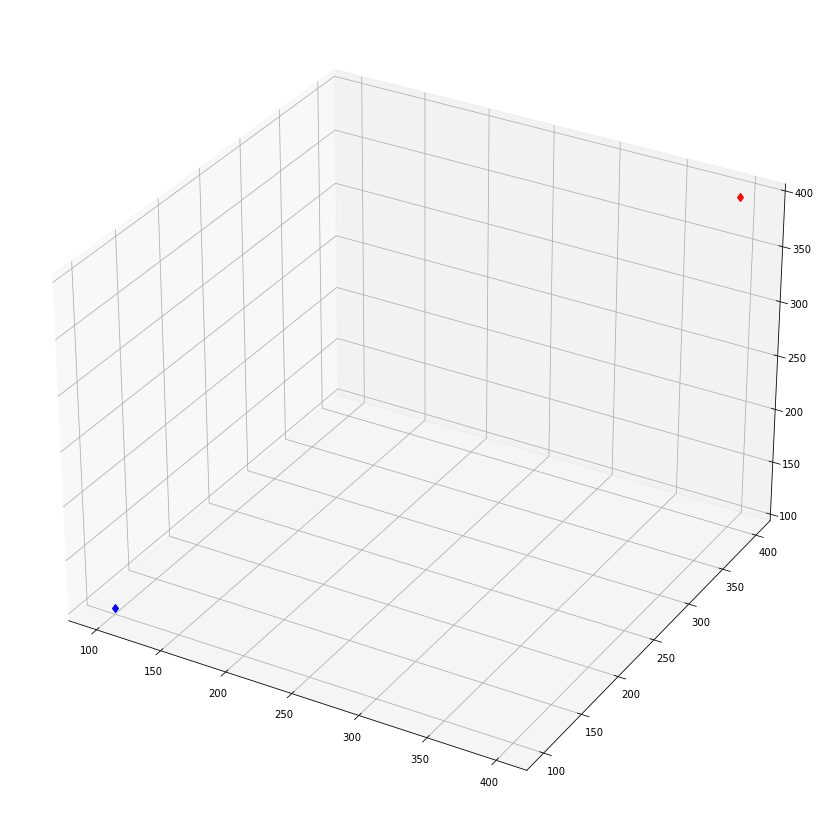

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


numberOfPoints = 500

# Make a space for everything to live
x = np.linspace(0, numberOfPoints)
y = np.linspace(0, numberOfPoints)
z = np.linspace(0, numberOfPoints)
XX, YY, ZZ = np.meshgrid(x, y, z)
G = 0.0667
massMoon = 1
massEarth = 1

# Generate a Earth
earthRadius = 6.3
earthPosition = np.array([100, 100, 100])

# Generate a Moon
moonRadius = 1.7
moonPosition = np.array([400, 400, 400])


# Generating Field Force Data
# Array positions are:
# [x position, y position, Fx, Fy]
gravitationalField = np.zeros((len(x), 4))

def gravity(vec):
    rM = vec - moonPosition
    rE = vec - earthPosition

    rm_mag = np.linalg.norm(rM)
    re_mag = np.linalg.norm(rE)

    return G * (massMoon * rM / (rm_mag) ** 3 + massEarth * rE / (re_mag)**3)

data = []
for i in x:
    for j in y:
        for k in z:
            r = [i, j, k]
            f = gravity(r)
            data.append([i, j, k, f[0], f[1], f[2]])

data = np.array(data)
data.tofile("test.raw")


# plt.plot(moonPosition[0], moonPosition[1], 'r.', ms = moonRadius, zorder = 10, label = "Moon")
# plt.plot(earthPosition[0], earthPosition[1], 'b.', ms = earthRadius, zorder = 10, label = "Earth")
# plt.plot(XX, YY, 'k.', ms = 0.5)
# plt.grid()
# # plt.legend()
# plt.show()


plt.figure(figsize = (15, 15))
ax = plt.axes(projection='3d')
ax.plot3D(moonPosition[0], moonPosition[1], moonPosition[2], c = 'r', marker = 'd')
ax.plot3D(earthPosition[0], earthPosition[1], earthPosition[2], c = 'b', marker = 'd')

